# Pandas Basics
pandas takes different datatypes
- pandas handles dataframes (df) - explore, clean, process tabular data
- supports: csv, excel, sql, json, parquet... import with read_*
- slicing, selecting, filtering w. conditions
- plotting: scatter, var, boxplot
- basic statistics: mean, median, min/max, counts
- structure datatables w. melt() and pivot()
- concatenate column and row wise to combine multiple tables
- times-series
- clean textual data and extract information

In [11]:
import pandas as pd
import numpy as np
import statistics as st

## create a dataframe

columnwise

In [12]:
df1 = pd.DataFrame(
{"a" : [1 ,4, 7],       # col a
 "b" : [2, 5, 8],       # col b
 "c" : [3, 6, 9]},    
index = [1, 2, 3])      # row index

df1

,a,b,c
1,1,2,3
2,4,5,6
3,7,8,9


rowwise

In [13]:
df2 = pd.DataFrame(
[[1, 2, 3],      # row 1
[4, 5, 6],       # row 2
[7, 8, 9]], 
index=[1, 2, 3], 
columns=['a', 'b', 'c'])   # column names

df2

,a,b,c
1,1,2,3
2,4,5,6
3,7,8,9


## read data

In [14]:
pd.read_csv(filename)                             # From a CSV file
pd.read_table(filename)                         # From a delimited text file (like TSV)
pd.read_excel(filename)                         # From an Excel file
pd.read_sql(query, connection_object)       # Read from a SQL table/database
pd.read_json(json_string)                       # Read from a JSON formatted string, URL or file.
pd.read_html(url)                                     # Parses an html URL, string or file and extracts tables to a list of dataframes
pd.read_clipboard()                                 # Takes the contents of your clipboard and passes it to read_table()
pd.DataFrame(dict)                                  # From a dict, keys for columns names, values for data as lists

NameError: name 'filename' is not defined

## Exporting Data
Use these commands to export a DataFrame to CSV, .xlsx, SQL, or JSON.

In [ ]:
df.to_csv(filename)                            # Write to a CSV file
df.to_excel(filename)                          # Write to an Excel file
df.to_sql(table_name, connection_object)       # Write to a SQL table
df.to_json(filename)                           # Write to a file in JSON format

## Inspecting Data
Use these commands to take a look at specific sections of your pandas DataFrame or Series.

In [ ]:
print(df2.head(2))                        # First n rows of the DataFrame
print(df2.tail(3))                        # Last n rows of the DataFrame
print(df.shape)                           # Number of rows and columns
print(df.info())                          # Index, Datatype and Memory information
print(df.describe())                      # Summary statistics for numerical columns
print(s.value_counts(dropna=False))       # View unique values and counts
print(df.apply(pd.Series.value_counts))   # Unique values and counts for all columns

In [ ]:
df.info

<bound method DataFrame.info of                 Country  CountryID  Continent  Adolescent fertility rate (%)  \
0           Afghanistan          1          1                          151.0   
1               Albania          2          2                           27.0   
2               Algeria          3          3                            6.0   
3               Andorra          4          2                            NaN   
4                Angola          5          3                          146.0   
..                  ...        ...        ...                            ...   
197             Vietnam        198          6                           25.0   
198  West Bank and Gaza        199          1                            NaN   
199               Yemen        200          1                           83.0   
200              Zambia        201          3                          161.0   
201            Zimbabwe        202          3                          101.0   

     Ad

## Showing Data
option_context() - do it only within the context manager scope

and set_option() - changes the settings 

pd.reset_option(‘all’) - used to reset all the changes.

In [ ]:
with pd.option_context('display.max_rows', None,'display.max_columns', None,
    'display.precision', 3, ):

In [ ]:
# Permanently changes the pandas settings
# Default value of display.max_rows is 10 i.e. at max 10 rows will be printed.
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# All dataframes hereafter reflect these changes.
print(df)

# Resets the options
pd.reset_option('all')

In [ ]:

pd.set_option('display.max_rows', None)

## Data Cleaning
Use these commands to perform a variety of data cleaning tasks.

In [ ]:
df.columns = ['a','b','c']                      # Rename columns
pd.isnull()                                      # Checks for null Values, Returns Boolean Arrray
pd.notnull()                                    # Opposite of pd.isnull()
df.dropna()                                     # Drop all rows that contain null values
df.dropna(axis=1)                               # Drop all columns that contain null values
df.dropna(axis=1,thresh=2)                      # Drop all rows that have less than 2 non null values
df.fillna(x)                                    # Replace all null values with x
s.fillna(s.mean())                              # Replace all null values with the mean (mean can be replaced with almost any function from the statistics module)
s.astype(float)                                 # Convert the datatype of the series to float
s.replace(1,'one')                              # Replace all values equal to 1 with 'one'
s.replace([1,3],['one','three'])                # Replace all 1 with 'one' and 3 with 'three'
df.rename(columns={'old_name': 'new_ name'})    # Selective renaming
df.set_index('column_one')                      # Change the index
df.rename(columns=lambda x: x + 1)              # Mass renaming of columns
df.rename(index=lambda x: x + 1)                # Mass renaming of index

## Selection, filter, sort & group
Use these commands to select a specific subset of your data.

In [ ]:
print(df3)
print(df3[0])         # Returns column with label col as Series
print(df3[[0, 1]])    # Returns columns as a new DataFrame
print(s)
print(s.iloc[3])      # Selection by position
print(s.loc['1'])     # Selection by index
print(df)
print(df.iloc[0,:])     # First row
print(df.iloc[0,0])     # First element of first column

In [ ]:
df = pd.DataFrame(np.random.rand(20,5), columns=list("ABCDE")) # 5 columns and 20 rows of random floats
print(df)

df[df["A"] > 0.5]                           # Rows where the column A is greater than 0.5
df[(df["A"] > 0.6) & (df["A"] < 0.9)]      # Rows where 0.7 > A > 0.5
df.sort_values("A")                        # Sort values by col1 in ascending order
df.sort_values("A", ascending=False)       # Sort values by col2 in descending ordeprintr
df.sort_values(["A","B"],ascending=[True,False]) # Sort values by A in ascending order then B in descending order
df.groupby("A")                    # Returns a groupby object for values from one column
df.groupby(["A","B"])            # Returns groupby object for values from multiple columns
df.groupby("A")["B"]               # Returns the mean of the values in col2, grouped by the values in col1 (mean can be replaced with almost any function from the statistics module)

# Create a pivot table that groups by A and calculates the mean of B and C
print(df.pivot_table(index="A", values=["B", "C"], aggfunc=st.mean))

# Find the average across all columns for every unique col1 group
print(df.groupby("A").agg(np.mean))

print(df)
print(df.apply(np.mean))  # Apply the function np.mean() across each column
print(df.apply(np.max, axis=1))  # Apply the function np.max() across each row

df01 = pd.DataFrame(np.random.randint(0, 11, size=(4, 5)))
df02 = pd.DataFrame(np.random.randint(11, 21, size=(4, 5)))


In [ ]:
df2[::2] # select every second row

category              A                   B                   C            \
type                one       two       one       two       one       two   
bloodtype sex                                                               
X         men  0.351965 -0.068066  1.757515  1.976466  0.178422  1.534688   
Y         men -2.656323 -0.074661 -1.133029 -0.951994  0.393086 -0.583531   
Z         men  0.600243 -0.430237 -1.385815 -1.114507  2.236855 -0.223956   

category              D            
type                one       two  
bloodtype sex                      
X         men -2.283646 -0.665094  
Y         men -2.800236 -0.510031  
Z         men  0.314527 -0.188958

In [ ]:
df2[::-1] # slelect from bottom to top

category                A                   B                   C            \
type                  one       two       one       two       one       two   
bloodtype sex                                                                 
Z         women -0.198674 -1.399947  0.387080 -0.485106  1.156633  0.034137   
          men    0.600243 -0.430237 -1.385815 -1.114507  2.236855 -0.223956   
Y         women -0.971116 -0.672203 -1.340358 -0.088891  1.329186 -0.961857   
          men   -2.656323 -0.074661 -1.133029 -0.951994  0.393086 -0.583531   
X         women -0.633323 -0.408033  0.737679 -0.406095 -0.961680  0.360887   
          men    0.351965 -0.068066  1.757515  1.976466  0.178422  1.534688   

category                D            
type                  one       two  
bloodtype sex                        
Z         women  0.067610 -0.092273  
          men    0.314527 -0.188958  
Y         women  0.003222 -0.542861  
          men   -2.800236 -0.510031  
X         women -0.620939 -0.653238  
          men   -2.283646 -0.665094

### Join/Combine
Use these commands to combine multiple dataframes into a single one.

In [ ]:
print(df01.append(df02))                # Add the rows in df01 to the end of df02 (columns should be identical)
print(pd.concat([df01, df02],axis=1))   # Add the columns in df01 to the end of df02 (rows should be identical)

#SQL-style join the columns in df01 with the columns on df02 where
#the rows for col have identical values. 'how' can be one of 'left', 'right', 'outer', 'inner'
print(df01.join(df02,on=col1 ,how='inner'))

In [ ]:
df.dtypes    # shows the datatypes in the df also df.info, df.columns

Country                            object
CountryID                           int64
Continent                           int64
Adolescent fertility rate (%)     float64
Adult literacy rate (%)           float64
                                   ...   
Under_five_mortality_from_IHME    float64
Under_five_mortality_rate         float64
Urban_population                  float64
Urban_population_growth           float64
Urban_population_pct_of_total     float64
Length: 358, dtype: object

### filter columns

In [ ]:
df.Country    # for column names w/o a space in it
df["Adult literacy rate (%)"]  # for columns w space in its name

0      28.0
1      98.7
2      69.9
3       NaN
4      67.4
       ... 
197    90.3
198     NaN
199    54.1
200    68.0
201    89.5
Name: Adult literacy rate (%), Length: 202, dtype: float64

In [ ]:
df[["Country", "Adult literacy rate (%)"]]  # double brackets

,Country,Adult literacy rate (%)
0,Afghanistan,28.0
1,Albania,98.7
2,Algeria,69.9
3,Andorra,NaN
4,Angola,67.4
...,...,...
197,Vietnam,90.3
198,West Bank and Gaza,NaN
199,Yemen,54.1
200,Zambia,68.0


In [ ]:
df.Continent.unique() # uniques in a col

array([1, 2, 3, 4, 5, 6, 7])

### filter - boolean indexing

In [ ]:
df[df["Adult literacy rate (%)"] < 40] 

,Country,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total,Population annual growth rate (%),...,Total_CO2_emissions,Total_income,Total_reserves,Trade_balance_goods_and_services,Under_five_mortality_from_CME,Under_five_mortality_from_IHME,Under_five_mortality_rate,Urban_population,Urban_population_growth,Urban_population_pct_of_total
0,Afghanistan,1,1,151.0,28.0,NaN,NaN,NaN,26088.0,4.0,...,692.50,NaN,NaN,NaN,257.00,231.9,257.00,5740436.0,5.44,22.9
18,Benin,19,3,108.0,34.7,1250.0,73.0,87.0,8760.0,3.1,...,2564.80,2.730000e+09,35.41,-3.730000e+08,132.00,133.6,132.00,3404610.8,4.04,40.1
27,Burkina Faso,28,3,131.0,23.6,1130.0,42.0,52.0,14359.0,3.0,...,743.79,3.430000e+09,21.47,-3.900000e+08,190.36,168.2,190.36,2549805.5,5.09,18.3
34,Chad,35,3,193.0,25.7,1170.0,49.0,71.0,10468.0,3.1,...,139.23,2.790000e+09,14.17,-2.210000e+08,208.20,180.1,208.20,2566839.0,4.88,25.3
58,Ethiopia,59,3,109.0,35.9,630.0,68.0,74.0,81021.0,2.5,...,7881.26,1.040000e+10,17.91,-2.970000e+09,131.72,120.0,131.72,12000000.0,4.03,16.0
71,Guinea,72,3,153.0,29.5,1130.0,66.0,77.0,9181.0,2.0,...,1355.68,3.620000e+09,2.99,-1.530000e+08,164.40,135.6,164.40,2970876.5,3.12,33.0
110,Mali,111,3,192.0,24.0,1000.0,54.0,67.0,11968.0,3.0,...,564.26,3.290000e+09,28.25,-4.580000e+08,204.74,191.3,204.74,3541382.5,4.75,30.5
122,Mozambique,123,3,185.0,38.7,660.0,73.0,79.0,20971.0,2.1,...,1879.63,5.700000e+09,23.78,-8.040000e+08,177.10,171.6,177.10,7083773.0,4.47,34.5
132,Niger,133,3,199.0,28.7,630.0,37.0,50.0,13737.0,3.5,...,1058.90,2.200000e+09,12.60,-3.220000e+08,197.50,209.4,197.50,2228384.0,4.22,16.8
158,Senegal,159,3,100.0,39.3,1560.0,70.0,71.0,12072.0,2.5,...,5070.98,5.470000e+09,30.67,-1.010000e+09,121.48,104.2,121.48,4896461.5,3.05,41.6


In [ ]:
df[df["Population annual growth rate (%)"] > 3.8] 

,Country,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total,Population annual growth rate (%),...,Total_CO2_emissions,Total_income,Total_reserves,Trade_balance_goods_and_services,Under_five_mortality_from_CME,Under_five_mortality_from_IHME,Under_five_mortality_rate,Urban_population,Urban_population_growth,Urban_population_pct_of_total
0,Afghanistan,1,1,151.0,28.0,NaN,NaN,NaN,26088.0,4.0,...,692.50,NaN,NaN,NaN,257.0,231.9,257.0,5740436.0,5.44,22.9
28,Burundi,29,3,30.0,59.3,320.0,73.0,76.0,8173.0,3.9,...,223.50,790000000.0,7.61,-232000000.0,181.3,190.3,181.3,785879.1,6.64,10.0
100,Liberia,101,3,NaN,60.0,260.0,39.0,40.0,3579.0,3.9,...,472.66,444000000.0,0.99,NaN,143.9,172.7,143.9,1999683.5,4.07,58.1
180,Timor-Leste,181,6,49.0,NaN,5100.0,67.0,70.0,1114.0,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[["Country", "Adult literacy rate (%)", "Population annual growth rate (%)"]] \
[(df["Population annual growth rate (%)"] > 3) & (df["Adult literacy rate (%)"]  > 60)]  

,Country,Adult literacy rate (%),Population annual growth rate (%)
39,"Congo, Dem. Rep.",67.2,3.2
88,Jordan,91.1,3.3
147,Qatar,89.0,3.1
188,Uganda,68.1,3.2
190,United Arab Emirates,88.5,3.5


### indexing

#### indexing with iloc

In [ ]:
state.loc["Belarus"]
df.iloc[15]      # index location gives back one specific row

Country                             Belarus
CountryID                                16
Continent                                 2
Adolescent fertility rate (%)          22.0
Adult literacy rate (%)                99.6
                                    ...    
Under_five_mortality_from_IHME         10.3
Under_five_mortality_rate              15.1
Urban_population                  7057977.0
Urban_population_growth                0.11
Urban_population_pct_of_total          72.2
Name: 15, Length: 358, dtype: object

In [ ]:
df.iloc[15,0]    # row 16 column 1    

'Belarus'

In [ ]:
df.iloc[15,-1] # row 15, last col

72.2

In [ ]:
df.iloc[23:26]

,Country,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total,Population annual growth rate (%),...,Total_CO2_emissions,Total_income,Total_reserves,Trade_balance_goods_and_services,Under_five_mortality_from_CME,Under_five_mortality_from_IHME,Under_five_mortality_rate,Urban_population,Urban_population_growth,Urban_population_pct_of_total
23,Botswana,24,3,51.0,81.2,11730.0,85.0,83.0,1858.0,1.2,...,4554.35,8.050000e+09,1334.86,1.600000e+09,47.3,39.8,47.3,1.053828e+06,2.62,57.4
24,Brazil,25,5,71.0,88.6,8700.0,95.0,93.0,189323.0,1.3,...,325487.78,7.380000e+11,28.72,3.660000e+10,25.6,25.5,25.6,1.570000e+08,2.07,84.2
25,Brunei Darussalam,26,6,31.0,92.7,49900.0,94.0,94.0,382.0,2.1,...,5891.71,4.830000e+09,NaN,NaN,8.8,7.2,8.8,2.747658e+05,2.86,73.5


#### indexing with loc

In [ ]:
state = df.copy()  # copy of df
state.set_index("Country", inplace=True)  #set new index
state.head()

,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total,Population annual growth rate (%),Population in urban areas (%),...,Total_CO2_emissions,Total_income,Total_reserves,Trade_balance_goods_and_services,Under_five_mortality_from_CME,Under_five_mortality_from_IHME,Under_five_mortality_rate,Urban_population,Urban_population_growth,Urban_population_pct_of_total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1,1,151.0,28.0,NaN,NaN,NaN,26088.0,4.0,23.0,...,692.50,NaN,NaN,NaN,257.00,231.9,257.00,5740436.0,5.44,22.9
Albania,2,2,27.0,98.7,6000.0,93.0,94.0,3172.0,0.6,46.0,...,3499.12,4.790000e+09,78.14,-2.040000e+09,18.47,15.5,18.47,1431793.9,2.21,45.4
Algeria,3,3,6.0,69.9,5940.0,94.0,96.0,33351.0,1.5,64.0,...,137535.56,6.970000e+10,351.36,4.700000e+09,40.00,31.2,40.00,20800000.0,2.61,63.3
Andorra,4,2,NaN,NaN,NaN,83.0,83.0,74.0,1.0,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,5,3,146.0,67.4,3890.0,49.0,51.0,16557.0,2.8,54.0,...,8991.46,1.490000e+10,27.13,9.140000e+09,164.10,242.5,164.10,8578749.0,4.14,53.3


## Statistics
Use these commands to perform various statistical tests. (These can all be applied to a series as well.)

In [ ]:
df.describe()                                       # Summary statistics for numerical columns
df.mean()                                       # Returns the mean of all columns
df.corr()                                       # Returns the correlation between columns in a DataFrame
df.count()                                      # Returns the number of non-null values in each DataFrame column
df.max()                                        # Returns the highest value in each column
df.min()                                        # Returns the lowest value in each column
df.median()                                     # Returns the median of each column
df.std()                                        # Returns the standard deviation of each column

In [15]:
df = pd.read_csv("../data/WHO.csv")
df.head()  # df.tail()

,Country,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total,Population annual growth rate (%),...,Total_CO2_emissions,Total_income,Total_reserves,Trade_balance_goods_and_services,Under_five_mortality_from_CME,Under_five_mortality_from_IHME,Under_five_mortality_rate,Urban_population,Urban_population_growth,Urban_population_pct_of_total
0,Afghanistan,1,1,151.0,28.0,NaN,NaN,NaN,26088.0,4.0,...,692.50,NaN,NaN,NaN,257.00,231.9,257.00,5740436.0,5.44,22.9
1,Albania,2,2,27.0,98.7,6000.0,93.0,94.0,3172.0,0.6,...,3499.12,4.790000e+09,78.14,-2.040000e+09,18.47,15.5,18.47,1431793.9,2.21,45.4
2,Algeria,3,3,6.0,69.9,5940.0,94.0,96.0,33351.0,1.5,...,137535.56,6.970000e+10,351.36,4.700000e+09,40.00,31.2,40.00,20800000.0,2.61,63.3
3,Andorra,4,2,NaN,NaN,NaN,83.0,83.0,74.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,5,3,146.0,67.4,3890.0,49.0,51.0,16557.0,2.8,...,8991.46,1.490000e+10,27.13,9.140000e+09,164.10,242.5,164.10,8578749.0,4.14,53.3


### describe

In [16]:
df.describe().round(2)

,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total,Population annual growth rate (%),Population in urban areas (%),...,Total_CO2_emissions,Total_income,Total_reserves,Trade_balance_goods_and_services,Under_five_mortality_from_CME,Under_five_mortality_from_IHME,Under_five_mortality_rate,Urban_population,Urban_population_growth,Urban_population_pct_of_total
count,202.00,202.00,177.00,131.00,178.00,179.00,179.00,193.00,193.00,193.00,...,186.00,1.780000e+02,128.00,1.710000e+02,181.00,170.00,181.00,1.880000e+02,188.00,188.00
mean,101.50,3.58,59.46,78.87,11250.11,84.03,85.70,34098.05,1.30,54.91,...,148359.55,2.015567e+11,57.25,3.424012e+08,56.68,54.36,56.68,1.665763e+07,2.17,55.20
std,58.46,1.81,49.11,20.42,12586.75,17.79,15.45,130495.73,1.16,23.55,...,613309.10,9.400689e+11,138.67,5.943043e+10,60.06,61.16,60.06,5.094867e+07,1.60,23.74
min,1.00,1.00,0.00,23.60,260.00,6.00,11.00,2.00,-2.50,10.00,...,25.65,5.190000e+07,0.99,-7.140000e+11,2.90,3.00,2.90,1.545600e+04,-1.16,10.00
25%,51.25,2.00,19.00,68.40,2112.50,79.00,79.50,1340.00,0.50,36.00,...,1672.62,3.317500e+09,16.29,-1.210000e+09,12.40,8.48,12.40,9.171623e+05,1.10,35.65
50%,101.50,3.00,46.00,86.50,6175.00,90.00,90.00,6762.00,1.30,57.00,...,10211.56,1.145000e+10,28.52,-2.240000e+08,29.98,27.60,29.98,3.427661e+06,1.94,57.30
75%,151.75,5.00,91.00,95.30,14502.50,96.00,96.00,21732.00,2.10,73.00,...,65492.17,8.680000e+10,55.31,1.024000e+09,88.70,82.90,88.70,9.837113e+06,3.25,72.75
max,202.00,7.00,199.00,99.80,60870.00,100.00,100.00,1328474.00,4.30,100.00,...,5776431.50,1.100000e+13,1334.86,1.390000e+11,267.00,253.70,267.00,5.270000e+08,7.85,100.00


In [ ]:
df.describe(include="object") # summary stat on non-floats

,Country
count,202
unique,202
top,Afghanistan
freq,1


In [28]:
df.value_counts("Continent")


Continent
2    51
3    48
6    35
5    31
1    21
7     9
4     7
dtype: int64

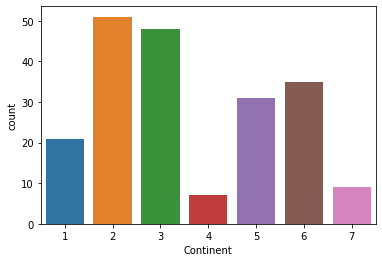

In [30]:
import seaborn as sns
sns.countplot(data=df, x=df.Continent, order=[1, 2, 3, 4, 5, 6, 7]);

## Reshaping Data – Change the layout of a data set

### melt

In [ ]:
pd.melt(df2)  # Gather columns into rows.

,variable,value
0,a,1
1,a,4
2,a,7
3,b,2
4,b,5
5,b,8
6,c,3
7,c,6
8,c,9


### concat

In [ ]:
df4 = pd.concat([df1,df2])    # Append rows of DataFrames
df4

,a,b,c
1,1,2,3
2,4,5,6
3,7,8,9
1,1,2,3
2,4,5,6
3,7,8,9


### sort_values

In [ ]:
df4.sort_values('b')    # Order rows by values of a column (low to high).

,a,b,c
1,1,2,3
1,1,2,3
2,4,5,6
2,4,5,6
3,7,8,9
3,7,8,9


### rename

In [ ]:
df5 = df4.rename(columns = {'b':'col2'})   # Rename the columns of a DataFrame
df5.head()

,a,col2,c
1,1,2,3
2,4,5,6
3,7,8,9
1,1,2,3
2,4,5,6


### drop_duplicates

In [ ]:
df5.drop_duplicates()

,a,col2,c
1,1,2,3
2,4,5,6
3,7,8,9


In [ ]:
state2 = state.copy()
state2

,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total,Population annual growth rate (%),Population in urban areas (%),...,Total_income,Total_reserves,Trade_balance_goods_and_services,Under_five_mortality_from_CME,Under_five_mortality_from_IHME,Under_five_mortality_rate,Urban_population,Urban_population_growth,Urban_population_pct_of_total,Average poulation growth rate in %
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1,1,151.0,28.0,NaN,NaN,NaN,26088.0,4.0,23.0,...,NaN,NaN,NaN,257.00,231.9,257.00,5740436.0,5.44,22.9,NaN
Albania,2,2,27.0,98.7,6000.0,93.0,94.0,3172.0,0.6,46.0,...,4.790000e+09,78.14,-2.040000e+09,18.47,15.5,18.47,1431793.9,2.21,45.4,NaN
Algeria,3,3,6.0,69.9,5940.0,94.0,96.0,33351.0,1.5,64.0,...,6.970000e+10,351.36,4.700000e+09,40.00,31.2,40.00,20800000.0,2.61,63.3,NaN
Andorra,4,2,NaN,NaN,NaN,83.0,83.0,74.0,1.0,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,5,3,146.0,67.4,3890.0,49.0,51.0,16557.0,2.8,54.0,...,1.490000e+10,27.13,9.140000e+09,164.10,242.5,164.10,8578749.0,4.14,53.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,198,6,25.0,90.3,2310.0,91.0,96.0,86206.0,1.4,27.0,...,4.480000e+10,47.11,-1.940000e+09,20.20,23.4,20.20,21900000.0,2.90,26.4,NaN
West Bank and Gaza,199,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.780000e+09,NaN,NaN,28.00,25.8,28.00,2596216.0,3.33,71.6,NaN
Yemen,200,1,83.0,54.1,2090.0,65.0,85.0,21732.0,3.0,28.0,...,1.150000e+10,114.52,8.310000e+08,82.40,87.9,82.40,5759120.5,4.37,27.3,NaN


In [ ]:
state2["Continent"].unique()

array([1, 2, 3, 4, 5, 6, 7])

### group_by

In [ ]:
pop_growth_continent = state2["Population annual growth rate (%)"].groupby("Continent").mean()
pop_growth_continent = pd.DataFrame(pop_growth_continent)
pop_growth_continent
# todo rename Continents

,Population annual growth rate (%)
Continent,
1,2.190000
2,0.282353
3,2.277083
4,0.950000
5,1.134483
6,1.033333
7,1.488889


## date range

In [ ]:
import pandas as pd
dates = pd.date_range("20220227", periods=10)
print(pd.DataFrame(dates))

           0
0 2022-02-27
1 2022-02-28
2 2022-03-01
3 2022-03-02
4 2022-03-03
5 2022-03-04
6 2022-03-05
7 2022-03-06
8 2022-03-07
9 2022-03-08


## to_numpy

In [ ]:
dates.to_numpy()

array(['2022-02-27T00:00:00.000000000', '2022-02-28T00:00:00.000000000',
       '2022-03-01T00:00:00.000000000', '2022-03-02T00:00:00.000000000',
       '2022-03-03T00:00:00.000000000', '2022-03-04T00:00:00.000000000',
       '2022-03-05T00:00:00.000000000', '2022-03-06T00:00:00.000000000',
       '2022-03-07T00:00:00.000000000', '2022-03-08T00:00:00.000000000'],
      dtype='datetime64[ns]')